<IPython.core.display.Javascript object>


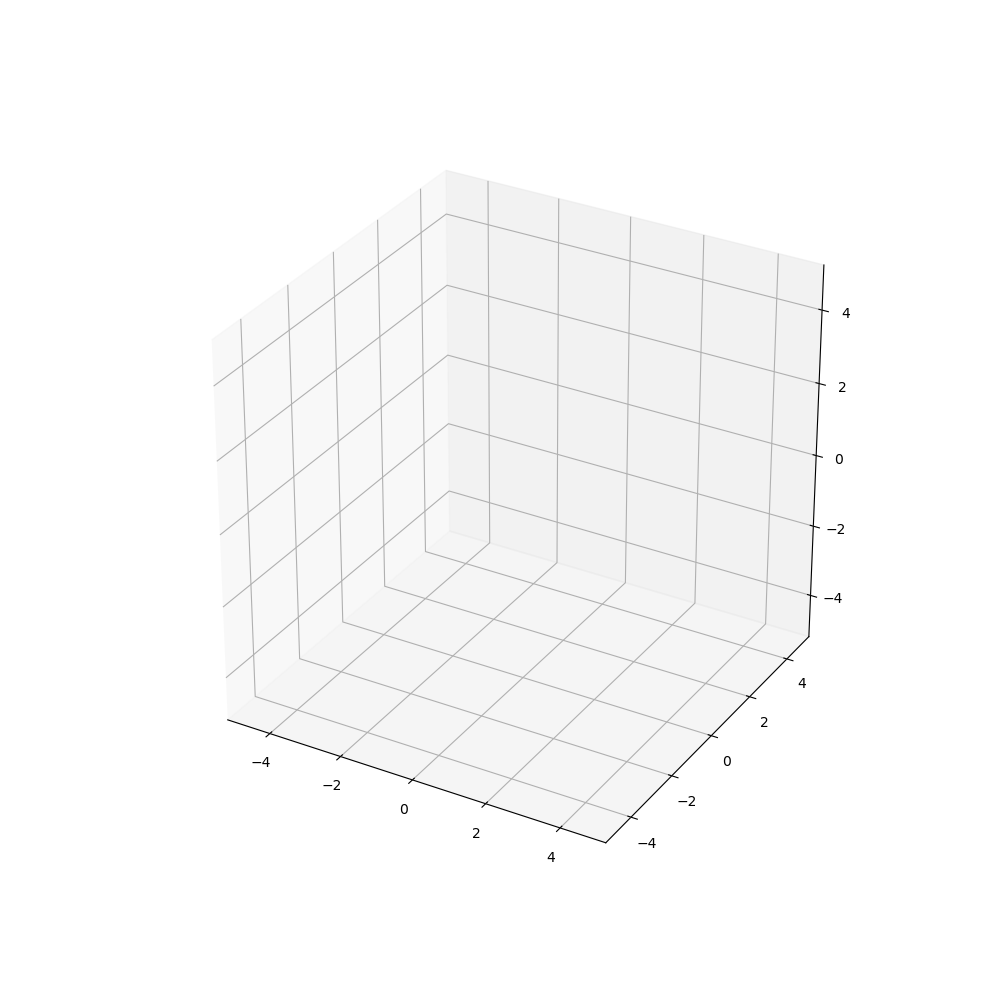

E
ERROR: C:\Users\А\AppData\Roaming\jupyter\runtime\kernel-e5eeafd5-c8ed-43c4-9868-105cf8685bf1 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\А\AppData\Roaming\jupyter\runtime\kernel-e5eeafd5-c8ed-43c4-9868-105cf8685bf1'

----------------------------------------------------------------------
Ran 1 test in 0.033s

FAILED (errors=1)


SystemExit: True

c:\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
#import gravitation_module as gm
from gravitation_mdl import Star, CosmicBody, max_norm
import matplotlib.pyplot as plt  
import numpy as np 
from numpy.linalg import norm 
import random as rd
import unittest
import numba as nb
### Тесты скатал у Остаповича (он разрешил)###
%matplotlib notebook

G = 4 * np.pi**2 # в системе единиц "годы, массы Солнца, а.е."
dt = 0.005
crash_distance = 0.001
#total_
total_time = 10 #в годах
dim = 3 #размерность задачи
destroy_flag = 0 
vmax = 3 #максимальная скорость моделируемых тел
radius = 2 #максимальное расстояние от начала координат для моделируемых тел
size = 5 #radius * 3
max_dist = 10

fig = plt.figure(figsize=(10, 10))
# Добавляем на нее объект Axes3D для отображения графиков в 3D
ax = fig.add_subplot(111, projection='3d')
plt.ion()
# Задаем границы
ax.axes.set_xlim3d(-size, size)
ax.axes.set_ylim3d(-size, size)
ax.axes.set_zlim3d(-size, size)    

        # Отображаем пустую фигуру
fig.show()
fig.canvas.draw()
time = 0
   
def test_random():
    a = CosmicBody()
    c = CosmicBody()
    b = Star(1., [0.,0.,0.], [0.,0.,0.])
    a.show()
    b.show()
    c.show()
    b.gravitate([a, c], time)

def test_destr():
    star = Star(1., [0.,0.,0.], [0.,0.,0.])
    body1 = CosmicBody(6e-6, [1., -0.05, 0.], [-1., 2., 0.])
    body2 = CosmicBody(6e-6, [1., 0.05, 0.], [-1., -2., 0.])
    body3 = CosmicBody(6e-6, [-1., 0.1, 0.], [1., -5., 0.])
    star.gravitate([body1, body2, body3], time)
    
def test_earth():
    size = 1
    sun = Star(1., [0.,0.,0.], [0.,0.,0.])
    earth = CosmicBody(6e-6, [1.,0.,0.], [0., 6.28318, 0.])
    sun.gravitate([earth],time)
    
def test_longtime():
    total_time = 10
    size = 1
    star = Star(1., [0.,0.,0.], [0.,0.,0.])
    earth = CosmicBody(6e-6, [1.,0.,0.], [0., 6.28318, 0.])
    sun.gravitate([earth], time)
    earth_trajectory = np.array(earth.trajectory)
    timing = np.arange(0., total_time+dt, dt)
    analytical_trajectory = np.array([[np.cos(2*np.pi*t), np.sin(2*np.pi*t), 0] for t in timing])
    print(max_norm(np.array(earth.trajectory) - analytical_trajectory))

class TestStar(unittest.TestCase):
    def test_init(self):
        star = Star(1, np.arange(3,dtype=np.float64), np.arange(3,dtype=np.float64))
        self.assertEqual(star.vec_r.tolist(), [0, 1, 2])
        self.assertEqual(star.vec_v.tolist(), [0, 1, 2])
        self.assertEqual(star.mass, 3.)
        
    def test_move(self):
        star = Star(2., (-1)*np.arange(3,dtype=np.float64), np.arange(3,dtype=np.float64)/2)
        body1 = CosmicBody(1., np.arange(3,dtype=np.float64), (-4)*np.arange(3,dtype=np.float64))
        body2 = CosmicBody(1e4, np.array([5]*3,dtype=np.float64), np.array([10]*3,dtype=np.float64))
        body3 = CosmicBody(1e4, np.array([5.02]*3,dtype=np.float64), (-1)*np.array([10]*3,dtype=np.float64))
        destr_list = star.move_system([body1, body2, body3], 0.)
        self.assertEqual(len(destr_list), 2)
        self.assertTrue(((body1.is_body(destr_list[0]))and(body2.is_body(destr_list[1]))or((body1.is_body(destr_list[1]))and(body2.is_body(destr_list[0])))))
        self.assertTrue(np.allclose(body1.vec_r,  np.array([2-4.5e-3, 4-9e-3 ,6-1.4e-2],), rtol = 1e-3))

    def test_destroy(self): # test commit the code and not destroy yourself
        body = Star(2., np.arange(3, dtype=np.float64),
                    np.arange(3, dtype=np.float64)+1,)
        obj = CosmicBody(1., (-1)*np.arange(3, dtype=np.float64), (-1)*np.arange(1,4, dtype=np.float64)) 
        body.destroy(obj)
        self.assertTrue(np.allclose(body.vec_r, np.zeros(3, dtype=np.float64)))
        self.assertTrue(np.allclose(body.vec_v, np.array([1., 2., 3.])/3))
        self.assertEqual(body.mass, 3.)

class TestCosmicBody(unittest.TestCase):
    def test_init(self):
        body = CosmicBody(1., np.arange(0., 3., 1.), np.arange(0.,3.,1.))
        self.assertEqual(body.vec_r.tolist(), [0., 1., 2.])
        self.assertEqual(body.vec_v.tolist(), [0., 1., 2.])
        self.assertEqual(body.mass, 3.)

    def test_move(self): 
        body = CosmicBody(1., np.arange(3,dtype=np.float64), np.arange(3,dtype=np.float64)+1)
        body.move(1.)
        self.assertEqual(body.vec_r.tolist(), [1., 3., 5.])

    def test_accelerate(self):
        body = CosmicBody(1, np.arange(3,dtype=np.float64), np.arange(3,dtype=np.float64)+1)
        body.accelerate(np.array([1,1,1],dtype=np.float64))
        self.assertEqual(body.vec_v.tolist(), [1.001, 2.001, 3.001])

unittest.main()
                
    #Тесты с анимацией '''


In [17]:
%matplotlib notebook
test_earth() 

C:\Users\А\Documents\GitHub\202-Advanced-Python-2\gravitation_mdl\gravitation_module.py:219: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  return


KeyboardInterrupt: 

In [ ]:
test_destr()

In [ ]:
test_random()

In [ ]:
test_longtime()